In [68]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy import integrate

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[8,6]

In [52]:
#first define the function
def f(chi):
    return ((1+(1-chi**2)**0.5)/2)**0.5

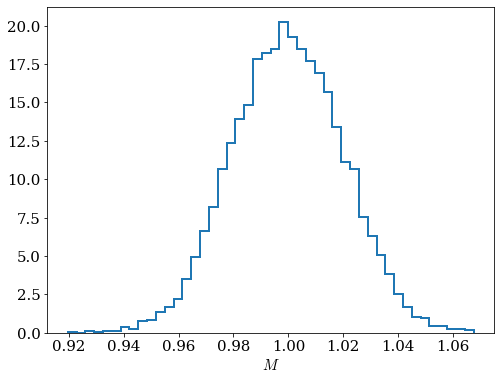

In [53]:
N=10000
scale=0.02
mean=1

#define the normal distribution of the masses
M=np.random.normal(loc=mean, scale=scale, size=N)
plt.hist(M, density=True, histtype='step', bins="scott", lw=2);
plt.xlabel('$M$')
plt.show()

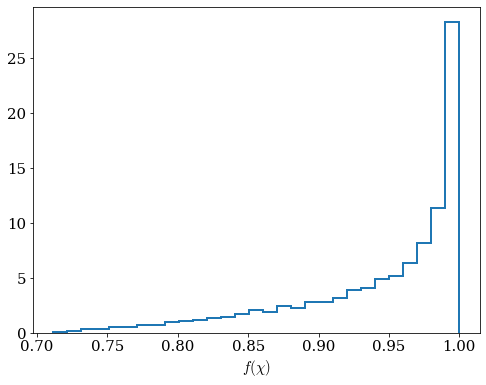

In [54]:
#consider now the distribution of the spin

chi=np.random.uniform(0,1,N)
m=f(chi)
plt.hist(m, density=True, histtype='step', bins="scott", lw=2);
plt.xlabel('$f(\chi)$')
plt.show()

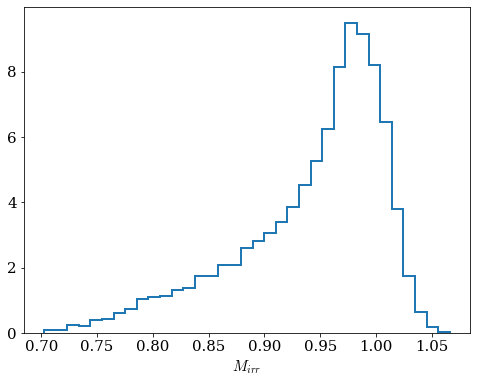

In [55]:
#the distribution of the irreducible mass can be obtained by multypling the two distributions

M_irr=M*m
plt.hist(M_irr, density=True, histtype='step', bins="scott", lw=2)
plt.xlabel('$M_{irr}$')
plt.show()

Text(0.5, 0, '$M_{irr}$')

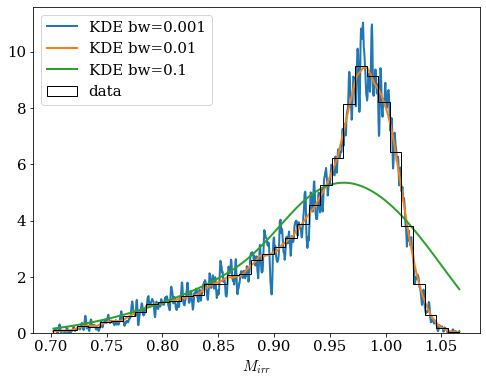

In [111]:
#let's do the same plot by considering a KDE

from sklearn.neighbors import KernelDensity
xgrid = np.linspace(M_irr.min(),M_irr.max(),1000)

def kde_sklearn(data, bandwidth, kernel):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis])

    return np.exp(log_pdf)

bw=[0.001, 0.01, 0.1]
for i in bw:
    KDE_dist = kde_sklearn(M_irr, i, "epanechnikov")
    plt.plot(xgrid, KDE_dist, label='KDE bw='+str(i), lw=2)
    
plt.hist(M_irr, density=True, histtype='step', bins="scott", lw=1, label='data', color='black')

plt.legend()
plt.xlabel('$M_{irr}$')

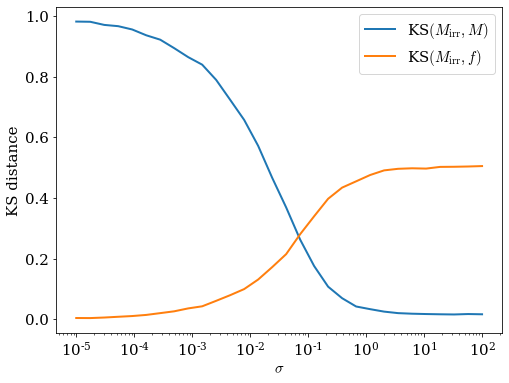

In [93]:
#KS test

sigma=np.logspace(-5, 2, 30)

ksM=[]
ksf=[]

for scale in sigma:
    chi = np.random.uniform(0,1,N)
    m = f(chi)
    M=np.random.normal(loc=1,scale=scale,size=N)
    
    ksM.append(scipy.stats.ks_2samp(M, M*m))
    ksf.append(scipy.stats.ks_2samp(m, M*m))
    
ksM= np.array(ksM)
ksf= np.array(ksf)

plt.plot(sigma,ksM[:,0],label="KS$(M_{\\rm irr}, M)$", lw=2)
plt.plot(sigma,ksf[:,0],label="KS$(M_{\\rm irr}, f)$", lw=2)
plt.semilogx()
plt.xlabel("$\sigma$")
plt.ylabel('KS distance')
plt.legend()
plt.show()

For $\sigma\rightarrow0$ the irreducible mass is distributed like $f$; instead for large values of $\sigma$ the distribution of the irreducible mass tends to the distribution of $M$.

In [79]:
#compare the exact solution with the KDE results

scale=0.02
x = np.linspace(min(1-5*scale,1/np.sqrt(2)),1+5*scale,N)

def integrand(f,x):
    return ((2/np.pi)**0.5 / scale ) * np.exp(-(x/f -1)**2 /(2*scale**2)) * (2*f**2-1)/(1 - f**2)**0.5 / f


Mirr = [scipy.integrate.quad(lambda f: integrand(f,xt), 1/2**0.5,1)[0] for xt in x]

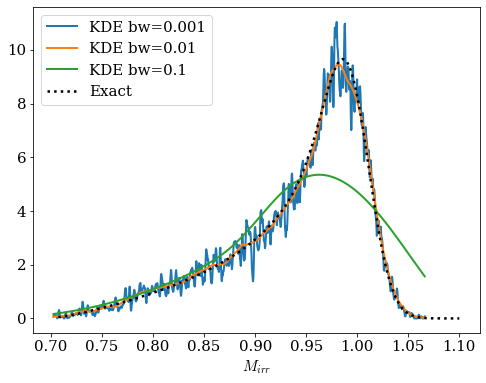

In [106]:
for i in bw:
    KDE_dist = kde_sklearn(M_irr, i, "epanechnikov")
    plt.plot(xgrid, KDE_dist, label='KDE bw='+str(i), lw=2)

plt.plot(x,Mirr,label='Exact',c='black',ls='dotted', lw=2.5)

plt.xlabel('$M_{irr}$')
plt.legend()
plt.show()